In [1]:
import os
os.chdir('C:\\Users\91939\Desktop\RR solutions')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Application_Data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [5]:
df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [6]:
#we are filtering the columns that have non numeric values to see if they are useful
ot = pd.DataFrame(df.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1     Applicant_Gender
6          Income_Type
7       Education_Type
8        Family_Status
9         Housing_Type
14           Job_Title
Name: index, dtype: object

In [7]:
num_type = pd.DataFrame(df.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']

In [8]:
a = df[object_type]['Applicant_Gender'].value_counts()
b = df[object_type]['Income_Type'].value_counts()
c = df[object_type]['Education_Type'].value_counts()
d = df[object_type]['Family_Status'].value_counts()
e = df[object_type]['Housing_Type'].value_counts()
e = df[object_type]['Job_Title'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e)

F          15627
M           9501
Name: Applicant_Gender, dtype: int64 
 Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: Income_Type, dtype: int64 
 Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: Education_Type, dtype: int64 
 Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow           

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])

In [10]:
df.head(10)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,1,1,1,0,112500,4,4,1,1,...,0,0,0,16,2,59,4,0,30,1
1,5008808,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,5,1
2,5008809,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,5,1
3,5008810,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,27,1
4,5008811,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,39,1
5,5008815,1,1,1,0,270000,4,1,1,1,...,1,1,1,0,2,47,3,0,6,1
6,5008819,1,1,1,0,135000,0,4,1,1,...,0,0,0,8,2,49,4,0,8,1
7,5008820,1,1,1,0,135000,0,4,1,1,...,0,0,0,8,2,49,4,0,9,1
8,5008821,1,1,1,0,135000,0,4,1,1,...,0,0,0,8,2,49,4,0,9,1
9,5008822,1,1,1,0,135000,0,4,1,1,...,0,0,0,8,2,49,4,0,9,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Applicant_ID          25128 non-null  int64
 1   Applicant_Gender      25128 non-null  int32
 2   Owned_Car             25128 non-null  int64
 3   Owned_Realty          25128 non-null  int64
 4   Total_Children        25128 non-null  int64
 5   Total_Income          25128 non-null  int64
 6   Income_Type           25128 non-null  int32
 7   Education_Type        25128 non-null  int32
 8   Family_Status         25128 non-null  int32
 9   Housing_Type          25128 non-null  int32
 10  Owned_Mobile_Phone    25128 non-null  int64
 11  Owned_Work_Phone      25128 non-null  int64
 12  Owned_Phone           25128 non-null  int64
 13  Owned_Email           25128 non-null  int64
 14  Job_Title             25128 non-null  int32
 15  Total_Family_Members  25128 non-null  int64
 16  Appl

In [12]:
df[num_type].head()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,1,1,0,112500,1,0,0,0,2,59,4,0,30,1
1,5008808,0,1,0,270000,1,0,1,1,1,53,9,0,5,1
2,5008809,0,1,0,270000,1,0,1,1,1,53,9,0,5,1
3,5008810,0,1,0,270000,1,0,1,1,1,53,9,0,27,1
4,5008811,0,1,0,270000,1,0,1,1,1,53,9,0,39,1


In [77]:
df.describe()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,...,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.378104,0.418378,0.654927,0.509472,1.948365e+05,2.681511,3.059814,1.316738,1.322151,...,0.273758,0.292741,0.100684,7.704473,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.484923,0.493303,0.475402,0.762937,1.045211e+05,1.773412,1.358305,0.893770,1.016895,...,0.445895,0.455030,0.300916,4.340208,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,0.000000,1.350000e+05,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,4.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,0.000000,1.000000,0.000000,1.800000e+05,4.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,10.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,5.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,17.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [13]:
df.corr()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Applicant_ID,1.000000,0.002956,-0.025122,-0.086180,0.032139,-0.019236,0.021271,-0.008281,0.011254,0.012262,...,0.087290,0.013126,-0.062862,0.016365,0.024264,-0.037259,-0.022163,0.021023,0.011464,-0.011544
Applicant_Gender,0.002956,1.000000,0.340889,-0.038404,0.019633,0.192158,0.049840,0.043727,-0.058523,0.053690,...,0.015097,-0.023327,-0.021165,-0.015925,0.049945,-0.108441,-0.127388,0.022918,0.000297,-0.019264
Owned_Car,-0.025122,0.340889,1.000000,0.005219,0.069889,0.197574,-0.000715,-0.077618,-0.100905,0.006524,...,-0.022982,-0.024571,0.000403,-0.049131,0.114689,-0.072661,-0.071300,0.000112,0.035407,-0.001604
Owned_Realty,-0.086180,-0.038404,0.005219,1.000000,0.021575,0.034507,-0.028447,-0.001255,0.008190,-0.175401,...,-0.209380,-0.063773,0.061213,0.009923,0.019551,0.090323,0.008389,-0.018068,-0.035979,0.002716
Total_Children,0.032139,0.019633,0.069889,0.021575,1.000000,-0.015182,0.027394,-0.030444,-0.164346,0.008866,...,-0.011658,-0.021171,-0.014728,-0.006053,0.898460,-0.265141,-0.065068,-0.002668,-0.011748,0.011036
Total_Income,-0.019236,0.192158,0.197574,0.034507,-0.015182,1.000000,-0.154172,-0.211524,0.029559,-0.018484,...,-0.090286,0.010889,0.076031,0.006546,-0.026003,0.057930,0.019723,0.015181,0.030039,-0.003482
Income_Type,0.021271,0.049840,-0.000715,-0.028447,0.027394,-0.154172,1.000000,0.114358,-0.010775,-0.005557,...,0.084496,0.006254,-0.041780,-0.019825,0.031948,0.010484,0.037485,-0.016819,-0.003903,0.013117
Education_Type,-0.008281,0.043727,-0.077618,-0.001255,-0.030444,-0.211524,0.114358,1.000000,-0.010394,-0.025822,...,0.005949,-0.052542,-0.101003,0.096348,-0.020624,0.132624,0.043055,-0.005146,-0.006268,0.003486
Family_Status,0.011254,-0.058523,-0.100905,0.008190,-0.164346,0.029559,-0.010775,-0.010394,1.000000,0.035600,...,-0.044223,-0.020836,-0.017660,-0.016619,-0.533812,0.021138,0.000230,0.014892,-0.045231,-0.013942
Housing_Type,0.012262,0.053690,0.006524,-0.175401,0.008866,-0.018484,-0.005557,-0.025822,0.035600,1.000000,...,0.001047,-0.023630,-0.008069,-0.030286,-0.013531,-0.183300,-0.067236,0.001561,-0.019091,-0.001707


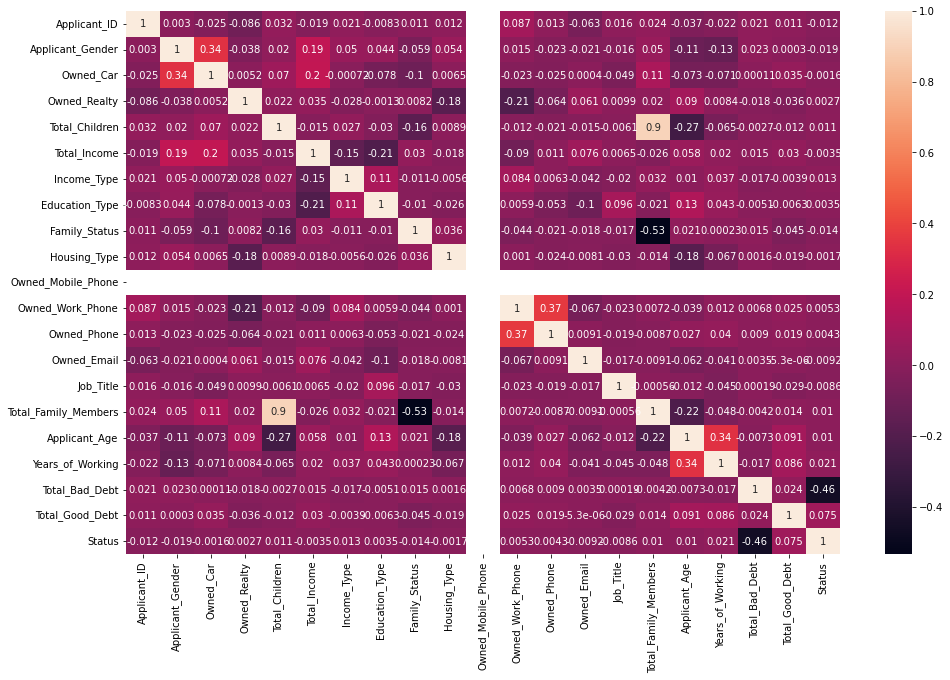

In [15]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
corr_mat = df.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

Total_Family_Members  Family_Status          -0.533812
Status                Total_Bad_Debt         -0.458497
Applicant_Age         Total_Children         -0.265141
                      Total_Family_Members   -0.217155
Education_Type        Total_Income           -0.211524
                                                ...   
Total_Income          Owned_Car               0.197574
Years_of_Working      Applicant_Age           0.338013
Owned_Car             Applicant_Gender        0.340889
Owned_Phone           Owned_Work_Phone        0.369395
Total_Family_Members  Total_Children          0.898460
Length: 190, dtype: float64


In [102]:
X = df.iloc[:,:-1] # X value contains all the variables except target variable('status' column)- df.iloc[row_start:row_end , col_start, col_end]
y = df.iloc[:,-1:] # these are the labels

In [103]:
X.shape

(25128, 20)

In [104]:
y.shape

(25128, 1)

In [105]:
# split data into train and test of its respective feature data columns and dependent columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [106]:
# we fit and transform the data into a scaler for accurate reading and results.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [28]:
!pip install imbalanced-learn

In [107]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [121]:
y_train.value_counts()

Status
1         17497
0            92
dtype: int64

In [123]:
y_balanced.value_counts()

Status
0         17497
1         17497
dtype: int64

In [118]:
y_balanced.shape

(34994, 1)

In [119]:
y_balanced.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [110]:
y_test.value_counts()

Status
1         7510
0           29
dtype: int64

In [111]:
y_test_balanced.value_counts()

Status
0         7510
1         7510
dtype: int64

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [113]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [114]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

C:\Users\91939\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91939\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91939\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91939\AppData\Local\Temp\ipykernel_1804\917336627.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

[0.9939418185974739, 0.9969994856261073, 0.9983711493398868, 1.0, 1.0, 1.0]
[0.9936750998668442, 0.735486018641811, 0.9292942743009321, 0.9828894806924101, 0.9958055925432756, 0.9996671105193076]


In [115]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7510
           1       1.00      1.00      1.00      7510

    accuracy                           1.00     15020
   macro avg       1.00      1.00      1.00     15020
weighted avg       1.00      1.00      1.00     15020



In [117]:
# saving file for deployment
import pickle
with open('credit_model_xgboost.pkl', 'wb') as file:pickle.dump(classifier, file)